# U.S. COVID-19 Numbers of Cases by States

Data source: https://github.com/CSSEGISandData/COVID-19 by Johns Hopkins University

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from datetime import date
from utilities import *
print(pd.__version__)

0.23.4


## Update state dataframe

In [3]:
#df_confirmed, df_deaths, df_recovered = us_states_dataframe_from_daily_report('1/22/2020','3/26/2020')

#df_confirmed.to_csv('us_states_confirmed.csv')
#df_deaths.to_csv('us_states_deaths.csv')
#df_recovered.to_csv('us_states_recovered.csv')

In [4]:
df= pd.read_csv('us_states_confirmed.csv', index_col=0)
data_confirmed_states = update_us_states_dataframe(df, case_type='confirmed')
df= pd.read_csv('us_states_deaths.csv', index_col=0)
data_deaths_states = update_us_states_dataframe(df, case_type='deaths')
df= pd.read_csv('us_states_recovered.csv', index_col=0)
data_recovered_states = update_us_states_dataframe(df, case_type='recovered')

In [5]:
data_confirmed_states.fillna(0, inplace=True)
data_deaths_states.fillna(0, inplace=True)
data_recovered_states.fillna(0, inplace=True)

In [6]:
data_confirmed_states.to_csv('us_states_confirmed.csv')
data_deaths_states.to_csv('us_states_deaths.csv')
data_recovered_states.to_csv('us_states_recovered.csv')

## Cumulated confirmed cases

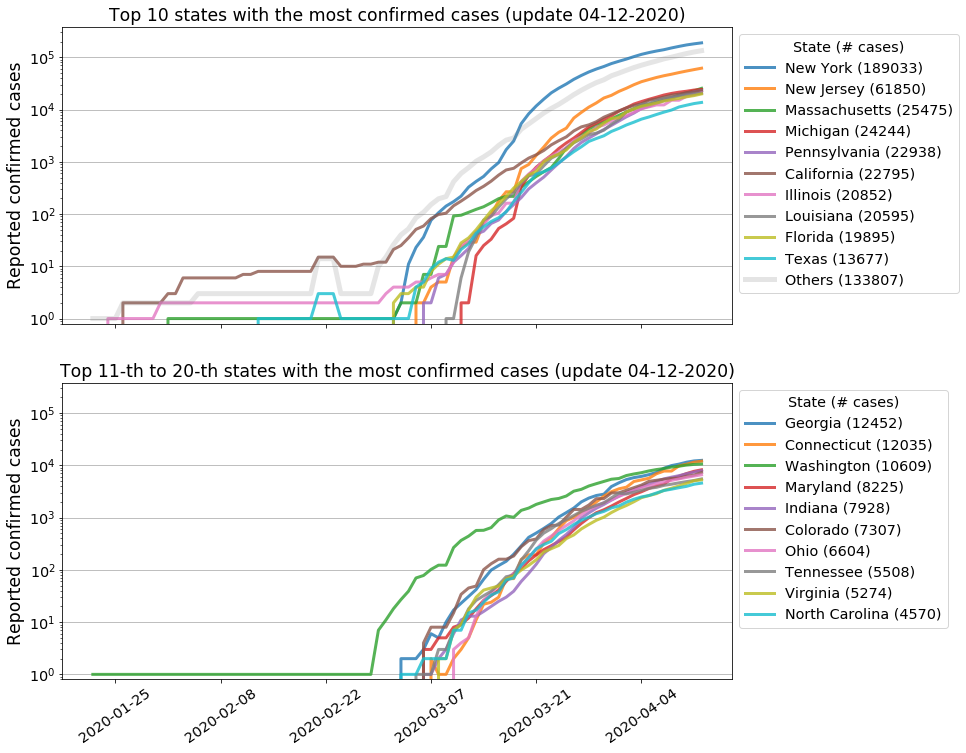

In [7]:
fig1, axes = plt.subplots(2, 1, figsize=(15,12), sharex=True, sharey=True)
plot_cumulated_histories(axes[0], data_confirmed_states, 0, 10, 'Top 10 states with the most confirmed cases', plot_remaining=True, legend_title='State')
plot_cumulated_histories(axes[1], data_confirmed_states, 10, 20, 'Top 11-th to 20-th states with the most confirmed cases', legend_title='State');

## Number of cases vs. days since the 100-th case

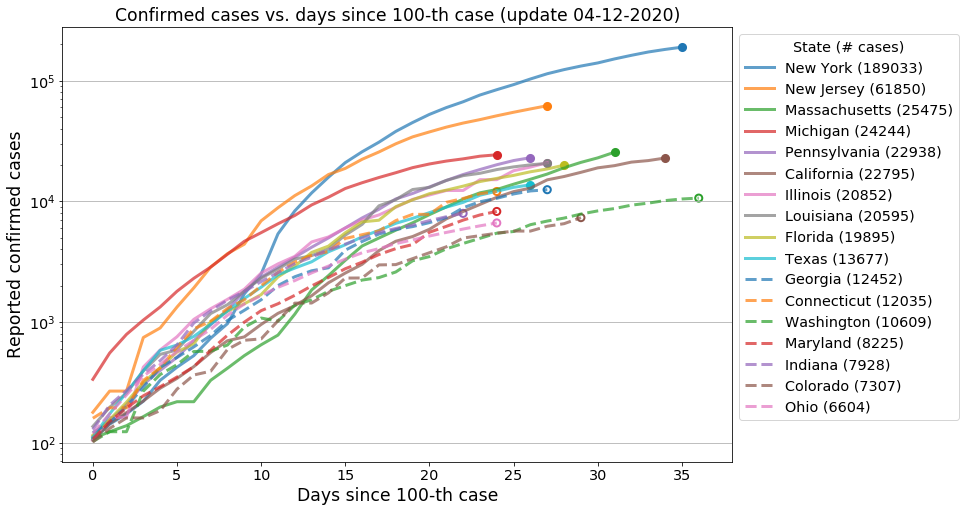

In [8]:
fig4, ax = plt.subplots(1, 1, figsize=(15,8))
plot_cumulated_since(ax, data_confirmed_states, 17, threshold=100, legend_title='State')

## New cases vs. existing cases

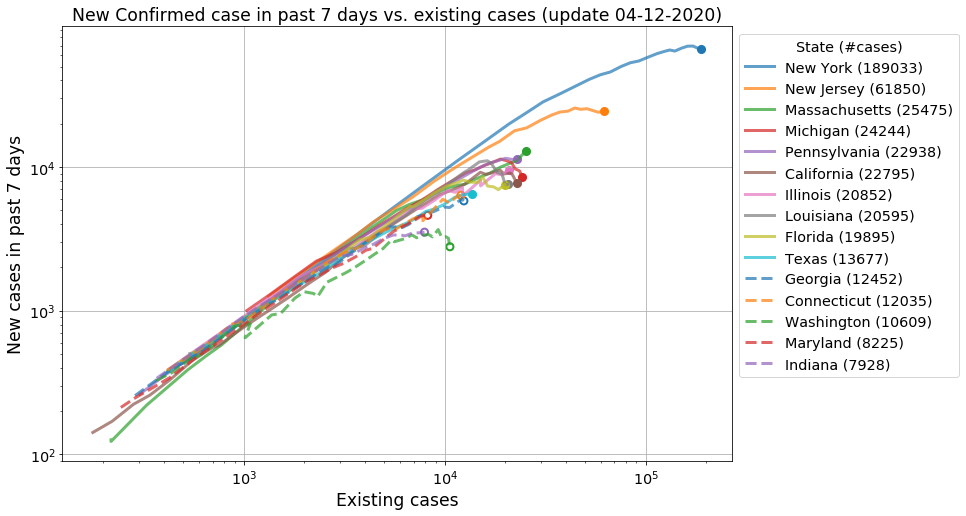

In [9]:
fig5, ax = plt.subplots(1, 1, figsize=(15,8))
plot_new_vs_existing(ax, data_confirmed_states, 7, 15, threshold=30, legend_title='State')

## Cumulated deaths in the states with heighest number of deaths

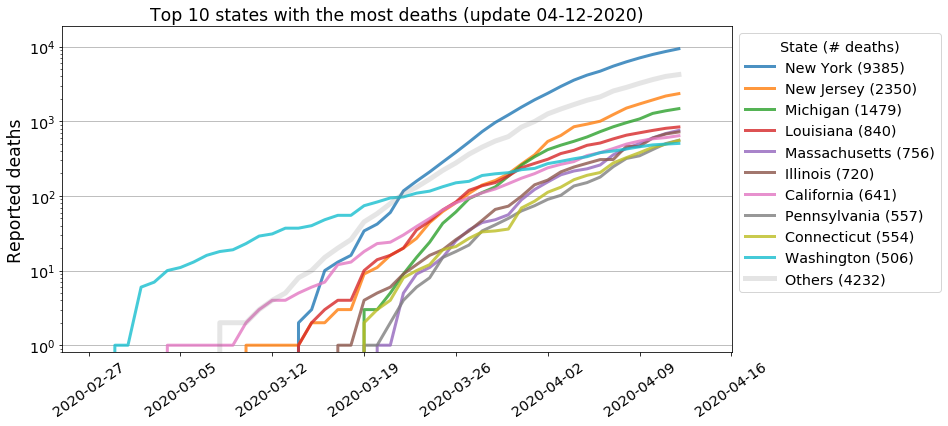

In [10]:
fig2, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_cumulated_histories(axes, data_deaths_states, 0, 10,'Top 10 states with the most deaths', case='deaths', plot_remaining=True, starting_date='2/25/20', legend_title='State');

## Case fatality ratio (deaths / confirmed)

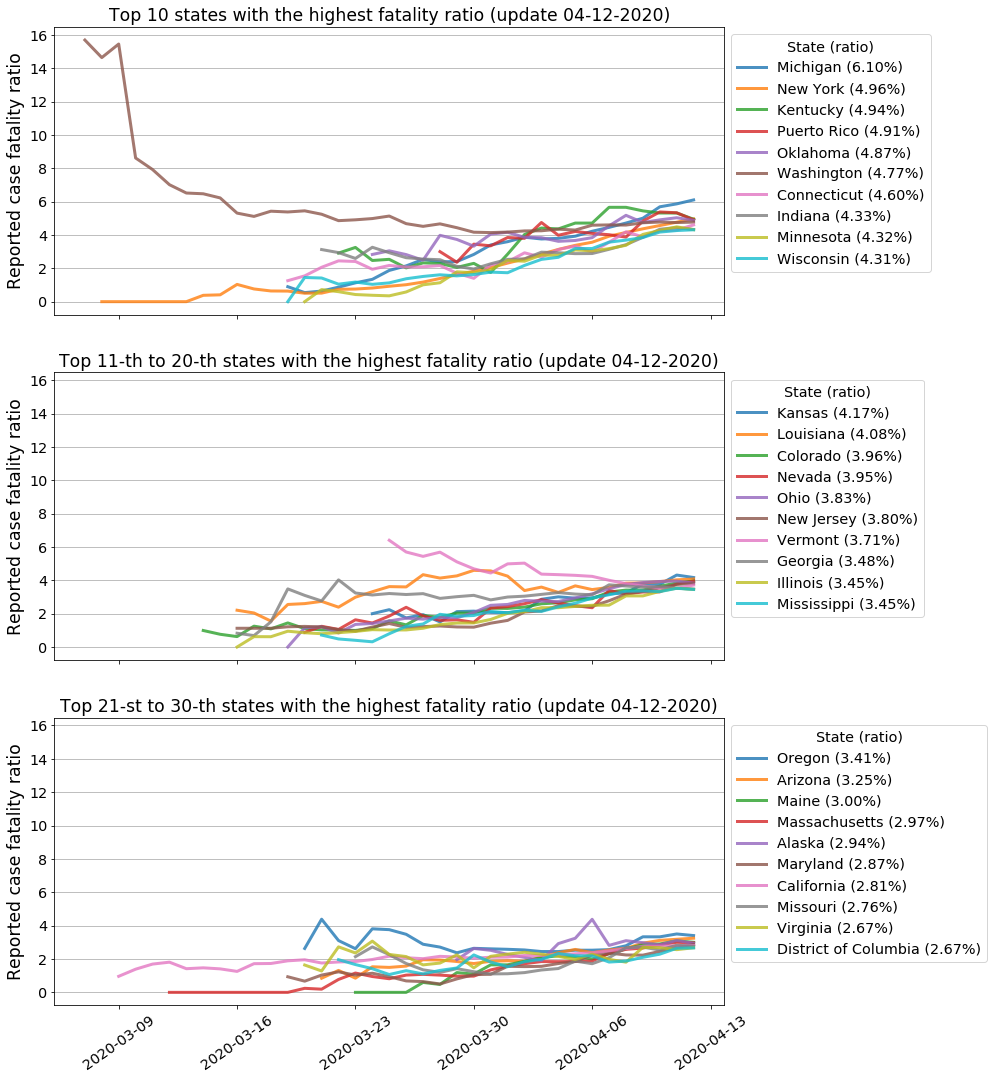

In [11]:
fig3, axes = plt.subplots(3, 1, figsize=(15,18), sharex=True, sharey=True)
plot_fatality_ratio(axes[0], data_deaths_states, data_confirmed_states, 0, 10, min_cases=200, threshold=100, title='Top 10 states with the highest fatality ratio', legend_title='State')
plot_fatality_ratio(axes[1], data_deaths_states, data_confirmed_states, 10, 20, min_cases=200, threshold=100, title='Top 11-th to 20-th states with the highest fatality ratio', legend_title='State')
plot_fatality_ratio(axes[2], data_deaths_states, data_confirmed_states, 20, 30, min_cases=200, threshold=100, title='Top 21-st to 30-th states with the highest fatality ratio', legend_title='State')

## Daily increase rate of confirmed cases

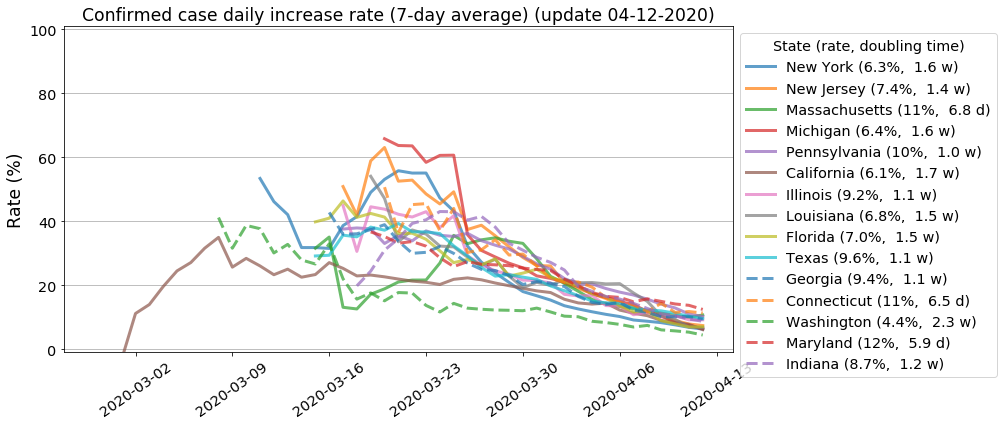

In [12]:
fig3, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_average_rate(axes, data_confirmed_states, 7, 15, threshold=10, legend_title='State')

## Daily increase rate of deaths

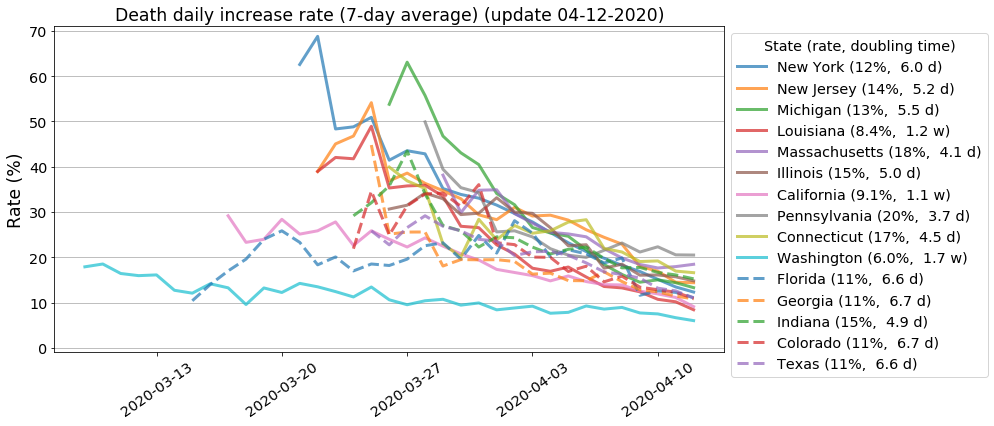

In [13]:
fig3, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_average_rate(axes, data_deaths_states, 7, 15, threshold=2, legend_title='State', title_head='Death', ymax=71)

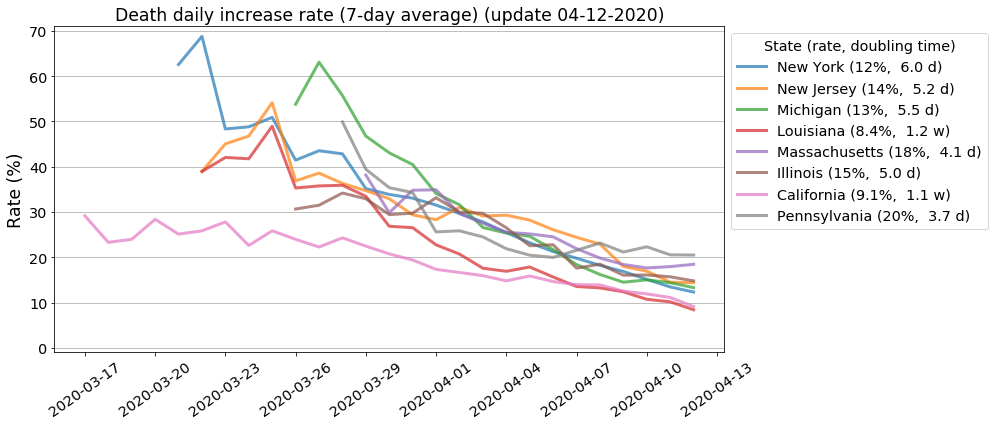

In [14]:
fig3, axes = plt.subplots(1, 1, figsize=(15,6), sharex=True, sharey=True)
plot_average_rate(axes, data_deaths_states, 7, 8, threshold=2, legend_title='State', title_head='Death', ymax=71)